1.2.1. Построить функцию, которая по вектору $a_1, \dots, a_n$ произвольной длины генерирует случайную величину $a_1 \cdot U_1 + \dots + a_n \cdot U_n$, где $U_i$ — независимые стандартные равномерные величины.

Сгенерировать выборку размера 10000 из распределения, представляющего сумму 3 независимых равномерных величин. Построить ее гистограмму.

In [ ]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_weighted_uniform(a):
    return np.array(a).dot(uniform.rvs(size=len(a)))

In [ ]:
sample = np.array([generate_weighted_uniform([1, 1, 1]) for i in range(10000)])

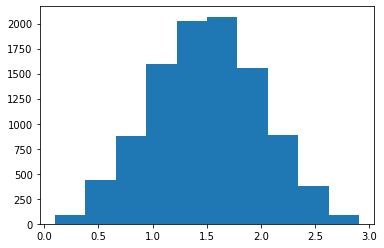

In [ ]:
plt.hist(sample)
plt.show()

1.2.2. В базе tips пакета seaborn хранится информация о посетителях ресторана. Какие в базе есть столбцы? Сколько мужчин и женщин побывало в ресторане, насколько отличаются их средние. Графически сравнить дни друг с другом, построить плотности стоимости чека для будних и выходных на одном графике и сделать выводы.

    tip in dollars,
    bill in dollars,
    sex of the bill payer,
    whether there were smokers in the party,
    day of the week,
    time of day,
    size of the party.


In [ ]:
import seaborn as sb

In [ ]:
tips = sb.load_dataset("tips")

In [ ]:
f'Столбцы: {list(tips.columns)}'

"Столбцы: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']"

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.groupby(by='sex').count()['day']

sex
Male      157
Female     87
Name: day, dtype: int64

In [ ]:
df = tips.groupby(by='sex').mean()
df

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [ ]:
df.loc['Male'] - df.loc['Female']

total_bill    2.687180
tip           0.256170
size          0.170803
dtype: float64

Вывод: Компания, в которой платит женщина, тратит меньше.

In [ ]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
tips['is_weekend'] = (tips['day'] == 'Sun') | (tips['day'] == 'Sat')

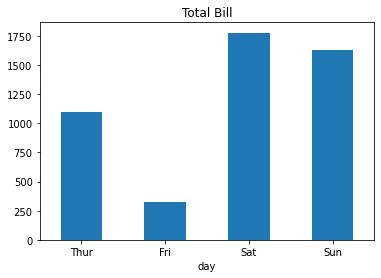

In [ ]:
tips.groupby(by='day').sum()['total_bill'].plot.bar(x='day', y='total_bill', rot=0, title='Total Bill')
plt.show()

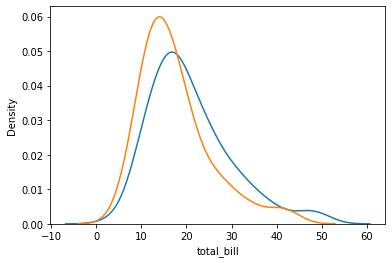

In [ ]:
good_hue = ['Weekend' * x + 'Weekdays' * (1-x) for x in tips['is_weekend']]
sb.kdeplot(tips[tips['is_weekend']]['total_bill'])
sb.kdeplot(tips[~tips['is_weekend']]['total_bill'])

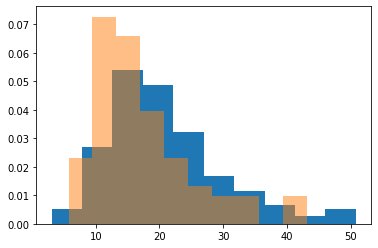

In [ ]:
tips['type_of_day'] = ['Weekend' * x + 'Weekdays' * (1-x) for x in tips['is_weekend']]
plt.hist(tips[tips['is_weekend']]['total_bill'], density=True)

plt.hist(tips[~tips['is_weekend']]['total_bill'], density=True, alpha=0.5)
plt.show()

Вывод: В выходные тратят больше, чем в будние дни.

1.2.3. В базе titanic пакета seaborne содержится информация о пассажирах Титаника. Графически исследовать какие параметры визуально кажутся наиболее повлиявшими на шансы выжить? Объяснить свой ответ.

In [ ]:
titanic = sb.load_dataset("titanic")

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Variable	Definition	Key

survival -	Survival -	0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex

Age -	Age in years
sibsp -	# of siblings / spouses aboard the Titanic
parch -	# of parents / children aboard the Titanic
ticket -	Ticket number
fare -	Passenger fare
cabin -	Cabin number
embarked -	Port of Embarkation -	C = Cherbourg, Q = Queenstown, S = Southampton

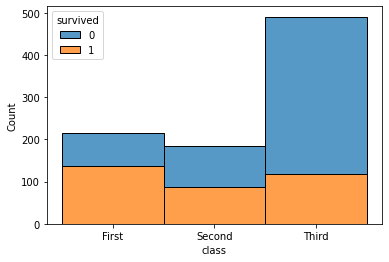

In [ ]:
sb.histplot(data=titanic, x="class", hue="survived", multiple="stack")

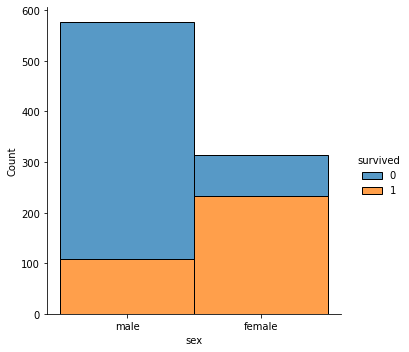

In [ ]:
sb.displot(data=titanic, x="sex", hue="survived", multiple="stack")

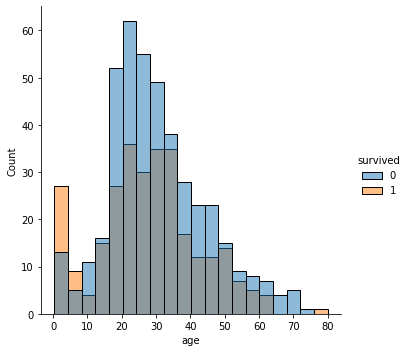

In [ ]:
sb.displot(data=titanic, x="age", hue="survived")

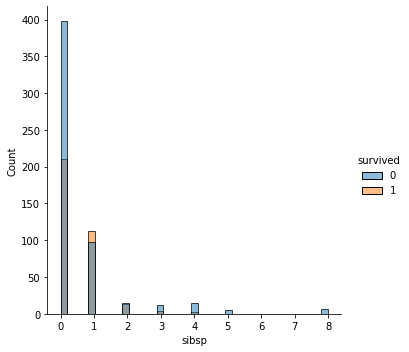

In [ ]:
sb.displot(data=titanic, x="sibsp", hue="survived")

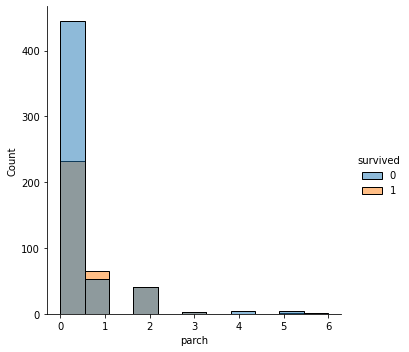

In [ ]:
sb.displot(data=titanic, x="parch", hue="survived")

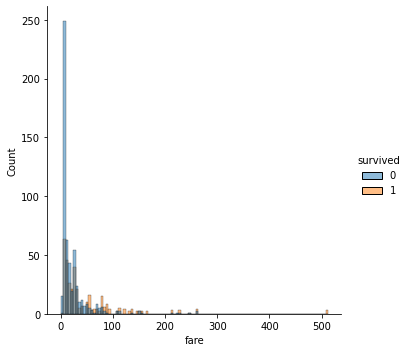

In [ ]:
sb.displot(data=titanic, x="fare", hue="survived")

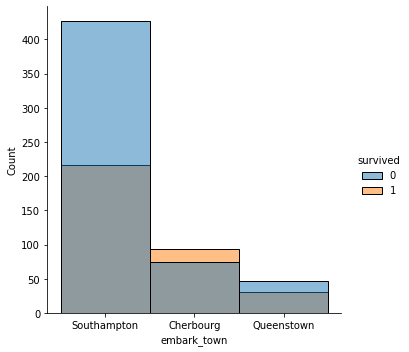

In [ ]:
sb.displot(data=titanic, x="embark_town", hue="survived")

Визуально кажется, что шанс выжить у людей низкого достатка ниже. Это видно по сильному отличию долей выживших среди пассажиров 3-го класса и высокому число невыживших, которые заплатили низкую плату.

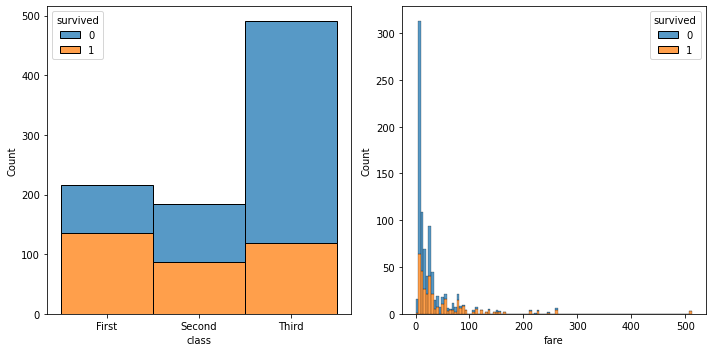

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sb.histplot(data=titanic, x="class", hue="survived", multiple="stack", ax=ax1)

sb.histplot(data=titanic, x="fare", hue="survived", multiple="stack", ax=ax2)

fig.tight_layout()


Также видно, что взрослые мужчины чаще не выживали, чем женщины и молодые мужчины.

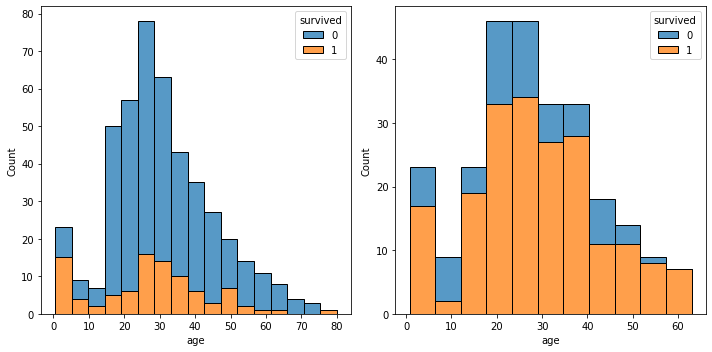

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sb.histplot(data=titanic[titanic['sex'] == 'male'], x="age", hue="survived", multiple="stack", ax=ax1)

sb.histplot(data=titanic[titanic['sex'] == 'female'], x="age", hue="survived", multiple="stack", ax=ax2)

fig.tight_layout()


Так же видно, что одиноки чаще не выживали по графикам числа родственников.

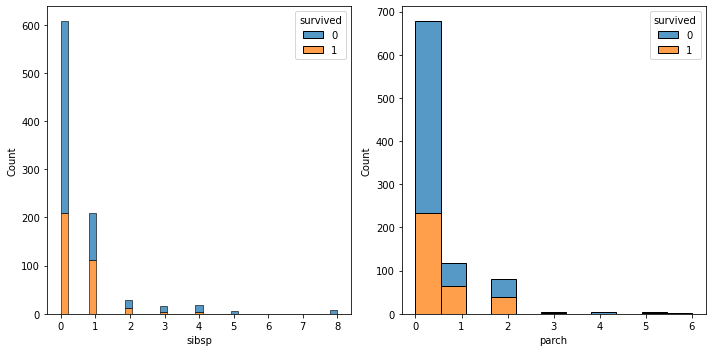

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sb.histplot(data=titanic, x="sibsp", hue="survived", multiple="stack", ax=ax1)

sb.histplot(data=titanic, x="parch", hue="survived", multiple="stack", ax=ax2)

fig.tight_layout()
